In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from pygmo import hypervolume
import random

## Tuning

In [2]:
reference = [6e9, 2e8]
hypervolumes = np.zeros([10, 20])
pareto = dict()

In [3]:
for run in range(0,5):
    pareto[run] = {}
    for iteration in range(0,20):
        pareto[run][iteration] = pd.read_csv(f"tuning_{run}_{iteration}.dat", sep="\s+", header = None)
        hv = hypervolume(pareto[run][iteration][[6,7]].values)
        hypervolumes[run, iteration] = hv.compute(reference)

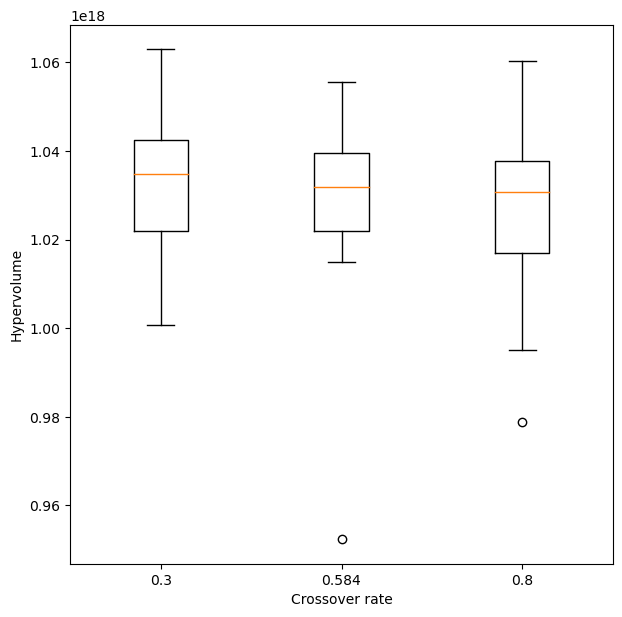

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot([hypervolumes[0], hypervolumes[1], hypervolumes[2]])
ax.set_xticklabels(["0.3", "0.584", "0.8"])
ax.set_xlabel('Crossover rate')
ax.set_ylabel('Hypervolume')
plt.savefig('moga_crossover.pdf')

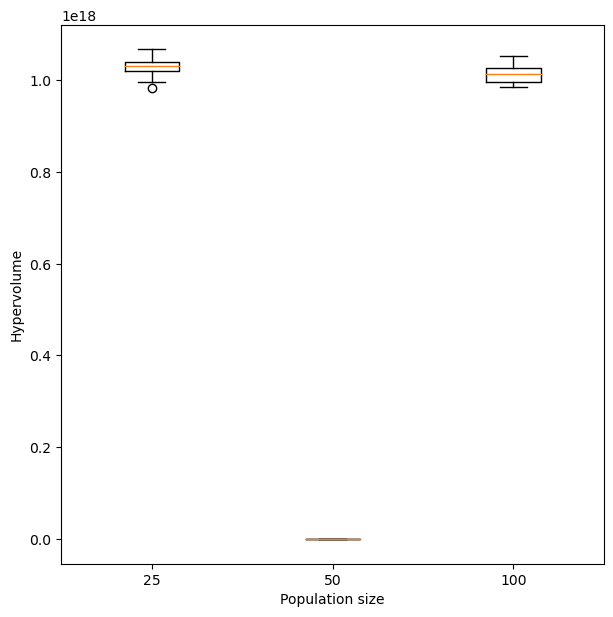

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot([hypervolumes[4],hypervolumes[5], hypervolumes[3]])
ax.set_xticklabels(["25", "50", "100"])
ax.set_xlabel('Population size')
ax.set_ylabel('Hypervolume')
plt.savefig("moga_population.pdf")

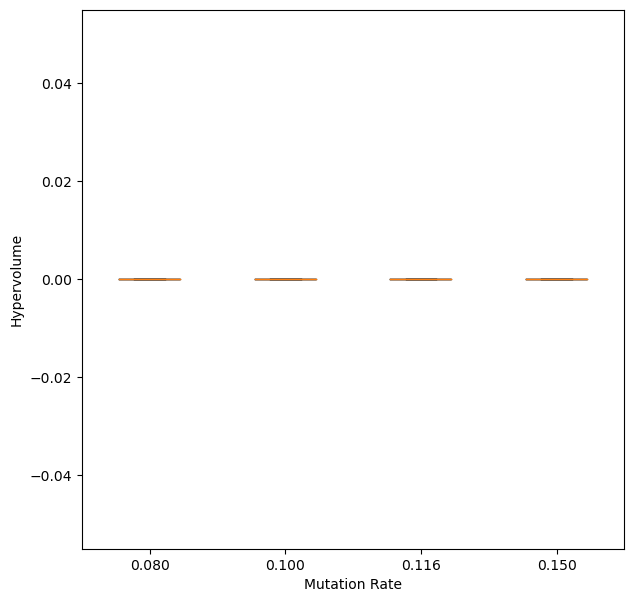

In [7]:
fig, ax = plt.subplots(figsize=(7,7))
ax.boxplot([hypervolumes[6], hypervolumes[7], hypervolumes[8], hypervolumes[9]])
ax.set_xticklabels(["0.080", "0.100", "0.116", "0.150"])
ax.set_xlabel('Mutation Rate')
ax.set_ylabel('Hypervolume')
plt.savefig("moga_mutation.pdf")

In [33]:
final = pd.read_csv("textbook_final.dat", sep="\s+",header=None)
runs = pd.read_csv("textbook_opt_multiobj1.dat", sep="\s+",header=0)

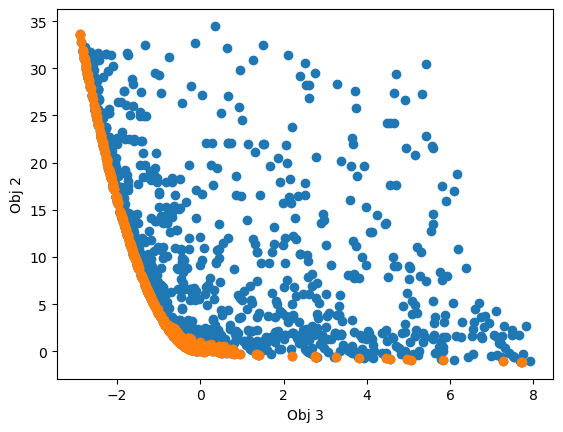

In [46]:
plt.plot(runs['obj_fn_3'], runs['obj_fn_2'], linestyle = 'None', marker = 'o')
plt.plot(final[4], final[3], linestyle = 'None', marker = 'o')
plt.xlabel('Obj 3')
plt.ylabel('Obj 2')
plt.savefig('example_pareto.png')

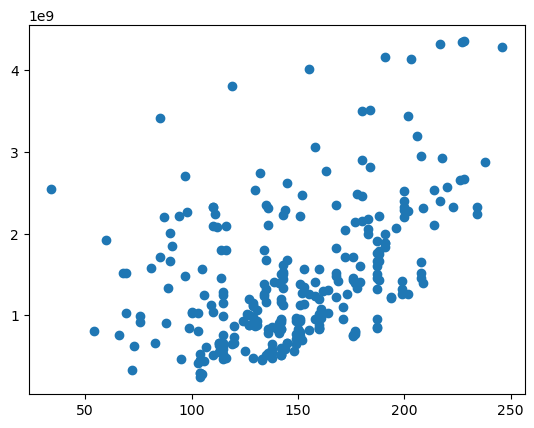

In [11]:
soga = pd.read_csv("tuning_0.dat", sep="\s+",header=0)
build = soga['xe100_share'] + soga['mmr_share'] + soga['voygr_share']
plt.plot(build, soga['haleu_swu'], linestyle='None', marker='o')